## Quarantine Frequency

The aim of this analysis is to identify the mention of 'quarantine' and related terms by our 3 blocks of countries: New Global Media Players, Euro-Atlantic Countries and Gulf Donors, over time (9 month period from Dec 2019 - Aug 2020). 

Mention of the term 'quarantine' and related terms can be seen from previous topic modelling analysis carried out by Tashfeen.

In [1]:
import pandas as pd # For dataframe analysis
import numpy as np
import re # Regix to remove punctuation from strings I split
from sklearn.feature_extraction.text import CountVectorizer # For creating document-term matrix & excluding stop words
from sklearn.feature_extraction import text # For getting stop words
import matplotlib.pyplot as plt # For graphs
import seaborn as sns # For graphs
%matplotlib inline

In [33]:
wordList = ['selfisolation', 'lockdown', 'quarantine', 'workfromhome', 'remote', 'stayhome']
yearMonths = ['201912', '202001', '202002', '202003', '202004', '202005', '202006', '202007', '202008']
yearMonthsWord = ['Dec 2019', 'Jan 2020', 'Feb 2020', 'Mar 2020', 'Apr 2020', 'May 2020', 'Jun 2020', 'Jul 2020', 'Aug 2020']

#### Process
Cleaning
 - need to remove the dash
 - Need to create a fxn that combines these terms
 - Need to create a fxn that combines the countries into 'blocks'

Terms:
- selfisolation 
- lockdown
- quarantine 
- stayathome
- workfromhome
- remote
- remoteworking


Analysis
- Get Dfs
- DTM Function
- Normalization based on shape
- DFs
- Combined Freq
- CSV Export for viz
- Plots for each country

In [14]:
df = pd.read_csv('covid_cleandf.csv')

In [15]:
def cleanTextInDf(mystring):
    mystring = mystring.lower() # Text normalization: make string lowercase
    mystring = re.sub(r'[^\w\s]','', mystring) # Text normalization: remove punctuation
    return mystring

In [16]:
def checkYearMonth(row):
    value = row['date']
    return str(value)[0:6]

In [17]:
def combinedTextForCountryDf(country):
    index = 0
    dfCountryYrList = []
    
    for ym in yearMonths:
        combinedText = ' '.join(df[(df['yearmonth'] == ym) & (df['country'] == country)].text)
        numRows, numCols = df[(df['yearmonth'] == ym) & (df['country'] == country)].shape
        dictCountryYr = {'country': country, 'yearmonth': ym, 'text': combinedText, 'shape': numRows}
        dfCountryYrList.append(dictCountryYr)
    return dfCountryYrList

In [18]:
# Cleaning the dataframe
cleanText = lambda text: cleanTextInDf(text) # Lambda function applies to all cells in a column
cleandf = pd.DataFrame(df.text.apply(cleanText)) # .apply() the function to all cells
df['text'] = cleandf['text']
df['yearmonth'] = df.apply(checkYearMonth, axis=1)
df

,name,path,country,network,date,token_freq,text,yearmonth
0,20191204_AE_KhaleejTimes_GDELT75493.txt,Raw text/AEClean/20191204_AE_KhaleejTimes_GDEL...,AE,KhaleejTimes,20191204,16,wknd inspired living kt home videos interactiv...,201912
1,20191214_TR_AnadoluAgency_NEXIS720304.txt,Raw text/TRClean/20191214_TR_AnadoluAgency_NEX...,TR,AnadoluAgency,20191214,4,virus transmitted to people from wild animals ...,201912
2,20191218_US_TheNewHumanitarian_GNAPI57383.txt,Raw text/USClean/20191218_US_TheNewHumanitaria...,US,TheNewHumanitarian,20191218,4,the humanitarian sector has a trust problem th...,201912
3,20191218_US_USAToday_GNAPI57390.txt,Raw text/USClean/20191218_US_USAToday_GNAPI573...,US,USAToday,20191218,7,alabama mobile researchers from the university...,201912
4,20191222_AE_KhaleejTimes_GDELT119076.txt,Raw text/AEClean/20191222_AE_KhaleejTimes_GDEL...,AE,KhaleejTimes,20191222,12,wknd inspired living kt home videos interactiv...,201912
...,...,...,...,...,...,...,...,...
12825,20200819_KW_KUNA_GDELT162457.txt,Raw text/KWClean/20200819_KW_KUNA_GDELT162457.txt,KW,KUNA,20200819,6,loc23272027 gmt kuwait april 23 kuna un secret...,202008
12826,20200819_KW_KUNA_GDELT169766.txt,Raw text/KWClean/20200819_KW_KUNA_GDELT169766.txt,KW,KUNA,20200819,3,loc15121212 gmt rome april 26 kuna the kuwaiti...,202008
12827,20200819_KW_KUNA_GDELT174322.txt,Raw text/KWClean/20200819_KW_KUNA_GDELT174322.txt,KW,KUNA,20200819,5,loc02532353 gmt kuwait march 6 kuna the kuwait...,202008
12828,20200819_KW_KUNA_GDELT176072.txt,Raw text/KWClean/20200819_KW_KUNA_GDELT176072.txt,KW,KUNA,20200819,6,loc00002100 gmt new york march 23 kuna in an a...,202008


In [19]:
countryYrList = combinedTextForCountryDf('US') # This function combines text and returns a list
countryYrDf = pd.DataFrame(countryYrList) # convert list to dataframe
countryYrDf # Show the data frame

,country,yearmonth,text,shape
0,US,201912,the humanitarian sector has a trust problem th...,2
1,US,202001,as the democratic republic of congo moves clos...,30
2,US,202002,one of the first cases of the new coronavirus ...,205
3,US,202003,health humanitarian emergencies covid19 global...,835
4,US,202004,new delhi ap they were hungry some had not eat...,1174
5,US,202005,the pandemic threatens to plunge half a billio...,645
6,US,202006,the german chancellor had announced earlier sa...,341
7,US,202007,racine wis a wisconsin judge has thrown out th...,323
8,US,202008,civil society featured global headlines health...,187


In [20]:
# Using built-in vocabulary for stop words.
# See https://scikit-learn.org/stable/modules/feature_extraction.html#stop-words
vectorizer = CountVectorizer(stop_words='english')
dataVectorizer = vectorizer.fit_transform(countryYrDf.text)
dataDtm = pd.DataFrame(dataVectorizer.toarray(), columns = vectorizer.get_feature_names())
dataDtm.index = countryYrDf.index # lets get the indices from previous dataframe
dataDtm = dataDtm.transpose() # Take a transpose
dataDtm # Take a look at the matrix: Y axis is word, X axis is yearMonth and values are frequencies

,0,1,2,3,4,5,6,7,8
00,0,0,0,0,5,0,1,1,0
000,0,0,0,3,9,1,6,0,0
00000,0,0,0,1,0,0,0,0,0
000000,0,0,4,2,3,2,1,1,1
000028,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
گریست,0,0,0,1,0,0,0,0,0
گویاست,0,0,0,1,0,0,0,0,0
یه,0,0,0,1,0,0,0,0,0
外交部,0,0,1,0,2,0,0,0,0


In [34]:
dataTf = dataDtm.transpose()[wordList]
dataTf

,selfisolation,lockdown,quarantine,workfromhome,remote,stayhome
0,0,0,0,0,0,0
1,0,9,30,0,1,0
2,3,44,359,0,8,0
3,32,366,501,1,39,4
4,33,907,463,3,79,15
5,9,639,279,1,66,4
6,4,345,186,1,25,1
7,8,291,131,0,46,3
8,1,135,108,1,54,0


In [35]:
dataTf["sum"] = dataTf.sum(axis=1)
dataTf

,selfisolation,lockdown,quarantine,workfromhome,remote,stayhome,sum
0,0,0,0,0,0,0,0
1,0,9,30,0,1,0,40
2,3,44,359,0,8,0,414
3,32,366,501,1,39,4,943
4,33,907,463,3,79,15,1500
5,9,639,279,1,66,4,998
6,4,345,186,1,25,1,562
7,8,291,131,0,46,3,479
8,1,135,108,1,54,0,299


In [36]:
dataTf['normalized_sum'] = dataTf["sum"]/countryYrDf['shape']
dataTf

,selfisolation,lockdown,quarantine,workfromhome,remote,stayhome,sum,normalized_sum
0,0,0,0,0,0,0,0,0.000000
1,0,9,30,0,1,0,40,1.333333
2,3,44,359,0,8,0,414,2.019512
3,32,366,501,1,39,4,943,1.129341
4,33,907,463,3,79,15,1500,1.277683
5,9,639,279,1,66,4,998,1.547287
6,4,345,186,1,25,1,562,1.648094
7,8,291,131,0,46,3,479,1.482972
8,1,135,108,1,54,0,299,1.598930


Text(0.5, 1.0, 'Quarantine and Related Word Frequencies')

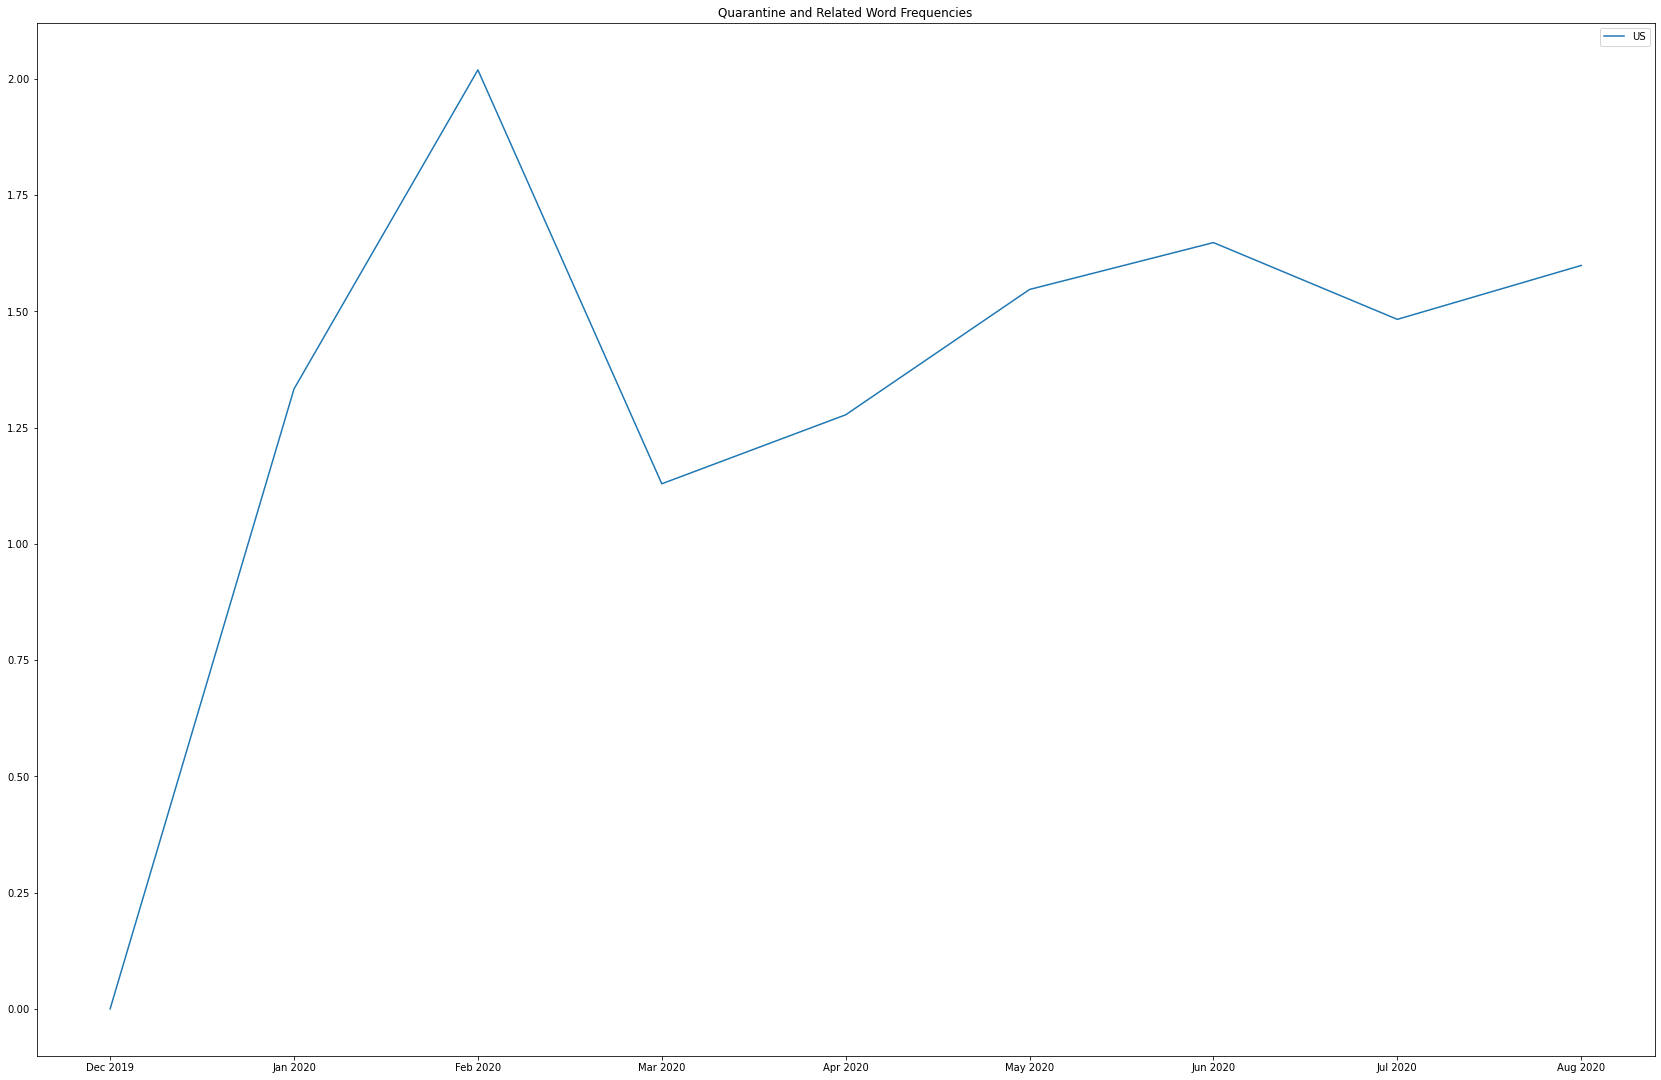

In [39]:
plt.figure(figsize=(29, 19))
# plt.subplot(4, 3, index+1)
plt.plot(yearMonthsWord, dataTf['normalized_sum'], label='US')
# plt.plot(years, dataTfUK[col], label='UK')
plt.legend()
plt.title('Quarantine and Related Word Frequencies') # make the term the title

In [45]:
def getDTM(country):
    countryYrList = combinedTextForCountryDf(country) # This function combines text and returns a list
    countryYrDf = pd.DataFrame(countryYrList) # convert list to dataframe
    vectorizer = CountVectorizer(stop_words='english')
    dataVectorizer = vectorizer.fit_transform(countryYrDf.text)
    dataDtm = pd.DataFrame(dataVectorizer.toarray(), columns = vectorizer.get_feature_names())
    dataDtm.index = countryYrDf.index # lets get the indices from previous dataframe
    dataDtm = dataDtm.transpose() # Take a transpose
    dataTf = dataDtm.transpose()[wordList]
    dataTf["sum"] = dataTf.sum(axis=1)
    dataTf['normalized_sum'] = dataTf["sum"]/countryYrDf['shape']
    return dataTf

In [68]:
#Euro-Atlantic Block
tfUS = getDTM('US')
tfUK = getDTM('UK')

In [60]:
# Gulf-donors Block
tfAe = getDTM('AE')
tfQa = getDTM('QA')

In [63]:
#New Global Media Players Block 
tfCn = getDTM('CN')
tfIr = getDTM('IR')
tfTr = getDTM('TR')
tfRu = getDTM('RU')

In [64]:
#Euro-Atlantic Block
wordList= ordList = ['selfisolation', 'lockdown', 'quarantine', 'remote']
tfDe = getDTM('DE')

In [65]:
# Gulf-donors Block
wordList= ordList = ['selfisolation', 'lockdown', 'quarantine']
tfKw = getDTM('KW')

In [36]:
# default state
wordList = ['selfisolation', 'lockdown', 'quarantine', 'workfromhome', 'remote', 'stayhome']

Text(0.5, 1.0, 'Mention of Quarantine and Related Words')

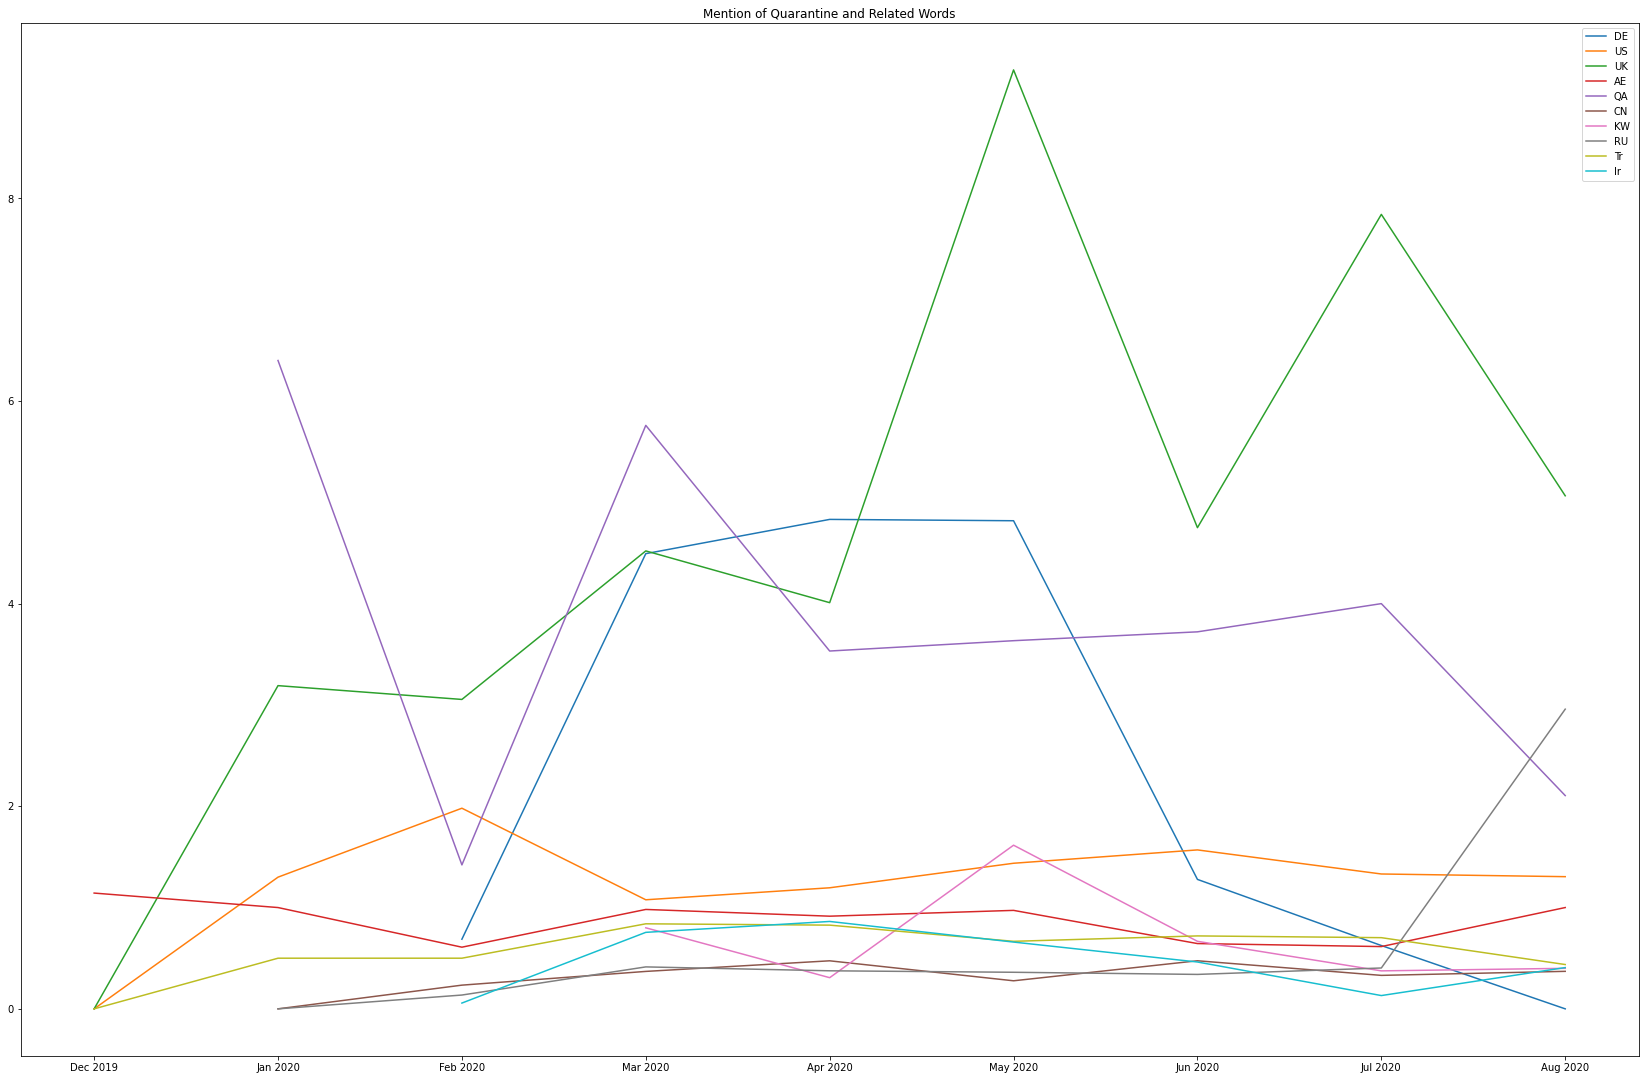

In [69]:
plt.figure(figsize=(29, 19))
# plt.subplot(4, 3, index+1)
plt.plot(yearMonthsWord, tfDe['normalized_sum'], label='DE')
plt.plot(yearMonthsWord, tfUS['normalized_sum'], label='US')
plt.plot(yearMonthsWord, tfUK['normalized_sum'], label='UK')
plt.plot(yearMonthsWord, tfAe['normalized_sum'], label='AE')
plt.plot(yearMonthsWord, tfQa['normalized_sum'], label='QA')
plt.plot(yearMonthsWord, tfCn['normalized_sum'], label='CN')
plt.plot(yearMonthsWord, tfKw['normalized_sum'], label='KW')
plt.plot(yearMonthsWord, tfRu['normalized_sum'], label='RU')
plt.plot(yearMonthsWord, tfTr['normalized_sum'], label='Tr')
plt.plot(yearMonthsWord, tfIr['normalized_sum'], label='Ir')
plt.legend()
plt.title('Mention of Quarantine and Related Words') # make the term the title

In [70]:
arr = tfIr["normalized_sum"].to_numpy()
arr

array([       nan,        nan, 0.05714286, 0.75514403, 0.8627451 ,
       0.65921788, 0.4625    , 0.13114754, 0.40740741])

In [71]:
tfIr

,selfisolation,lockdown,quarantine,remote,sum,normalized_sum
0,0,0,0,0,0,NaN
1,0,0,0,0,0,NaN
2,0,0,2,0,2,0.057143
3,1,19,346,1,367,0.755144
4,4,31,359,2,396,0.862745
5,0,25,93,0,118,0.659218
6,0,13,22,2,37,0.462500
7,0,6,1,1,8,0.131148
8,0,6,4,1,11,0.407407


In [72]:
arr = tfTr["normalized_sum"].to_numpy()
arr

array([0.        , 0.5       , 0.5       , 0.83950617, 0.82638889,
       0.66666667, 0.72      , 0.7027027 , 0.4375    ])

In [73]:
tfTr

,selfisolation,lockdown,quarantine,remote,sum,normalized_sum
0,0,0,0,0,0,0.000000
1,0,1,0,0,1,0.500000
2,0,0,2,0,2,0.500000
3,0,32,33,3,68,0.839506
4,1,91,24,3,119,0.826389
5,0,46,13,1,60,0.666667
6,2,24,8,2,36,0.720000
7,1,20,5,0,26,0.702703
8,2,3,2,0,7,0.437500


In [74]:
arr = tfRu["normalized_sum"].to_numpy()
arr

array([       nan, 0.        , 0.13636364, 0.41414141, 0.37566138,
       0.36111111, 0.34      , 0.40336134, 2.95833333])

In [75]:
tfRu

,selfisolation,lockdown,quarantine,remote,sum,normalized_sum
0,0,0,0,0,0,NaN
1,0,0,0,0,0,0.000000
2,0,1,8,0,9,0.136364
3,6,17,55,4,82,0.414141
4,21,73,41,7,142,0.375661
5,8,40,14,3,65,0.361111
6,1,25,6,2,34,0.340000
7,1,16,23,8,48,0.403361
8,11,32,25,3,71,2.958333


In [76]:
arr = tfKw["normalized_sum"].to_numpy()
arr

array([       nan,        nan,        nan, 0.8       , 0.30769231,
       1.61538462, 0.66666667, 0.375     , 0.4       ])

In [77]:
arr = tfCn["normalized_sum"].to_numpy()
arr

array([       nan, 0.        , 0.23404255, 0.36956522, 0.47425474,
       0.27699531, 0.47457627, 0.33043478, 0.37037037])

In [78]:
arr = tfQa["normalized_sum"].to_numpy()
arr

array([       nan, 6.4       , 1.42105263, 5.75961538, 3.53216374,
       3.63414634, 3.72151899, 4.        , 2.10526316])

In [79]:
arr = tfAe["normalized_sum"].to_numpy()
arr

array([1.14285714, 1.        , 0.60869565, 0.98125   , 0.9147541 ,
       0.97206704, 0.64444444, 0.6146789 , 1.        ])

In [80]:
arr = tfDe["normalized_sum"].to_numpy()
arr

array([       nan,        nan, 0.6875    , 4.49333333, 4.83146067,
       4.81818182, 1.27777778, 0.625     , 0.        ])

In [81]:
arr = tfUK["normalized_sum"].to_numpy()
arr

array([0.        , 3.19047619, 3.05426357, 4.52042629, 4.00946746,
       9.26843658, 4.75      , 7.84228188, 5.06470588])

In [82]:
arr = tfUS["normalized_sum"].to_numpy()
arr

array([0.        , 1.3       , 1.9804878 , 1.07664671, 1.19505963,
       1.4372093 , 1.56891496, 1.33126935, 1.30481283])